# Testing k-fold model

In [1]:
# import all required libraries
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# read test dataset and load model
fileObject = open("test.pkl",'rb')
classifier=pickle.load(fileObject)   
sc=pickle.load(fileObject)
x_test=pickle.load(fileObject)
y_test=pickle.load(fileObject)

In [3]:
x_test.shape,y_test.shape

((80, 2), (80,))

In [4]:
x_test=sc.transform(x_test)

In [5]:
# Predicting the Test set results
y_pred = classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [6]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [7]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)  

[[46  4]
 [ 1 29]]


In [8]:
acc=(accuracy_score(y_test, y_pred)*100)  
print('Accuracy is' , acc)  


Accuracy is 93.75


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


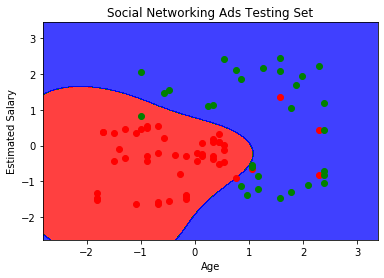

In [9]:
x,y=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

plt.title('Social Networking Ads Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()